In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.2/645.2 kB 8.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="aQdePzAoccvOcPnBipoR")
project = rf.workspace("mycollege").project("tumor-detection-2")
dataset = project.version(3).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled opencv-python-headless-4.8.1.78
  Attempting uninstall: idna


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.209, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to tumor-detection-2-3 in yolov8:: 100%|██████████| 3414/3414 [00:00<00:00, 5829.42it/s]


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8m-seg.pt')
model.train(data='/content/datasets/tumor-detection-2-3/data.yaml', epochs=150, imgsz=640)

Ultralytics YOLOv8.0.209 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/datasets/tumor-detection-2-3/data.yaml, epochs=150, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=to

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f6806334fa0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.04

In [ ]:
from distutils.dir_util import copy_tree
copy_tree("/content/runs/segment/train2", "/content/drive/MyDrive/tumorv4")

['/content/drive/MyDrive/tumorv4/labels.jpg',
 '/content/drive/MyDrive/tumorv4/labels_correlogram.jpg',
 '/content/drive/MyDrive/tumorv4/confusion_matrix.png',
 '/content/drive/MyDrive/tumorv4/MaskF1_curve.png',
 '/content/drive/MyDrive/tumorv4/MaskR_curve.png',
 '/content/drive/MyDrive/tumorv4/MaskPR_curve.png',
 '/content/drive/MyDrive/tumorv4/MaskP_curve.png',
 '/content/drive/MyDrive/tumorv4/train_batch0.jpg',
 '/content/drive/MyDrive/tumorv4/val_batch2_pred.jpg',
 '/content/drive/MyDrive/tumorv4/val_batch1_pred.jpg',
 '/content/drive/MyDrive/tumorv4/val_batch0_pred.jpg',
 '/content/drive/MyDrive/tumorv4/BoxPR_curve.png',
 '/content/drive/MyDrive/tumorv4/BoxP_curve.png',
 '/content/drive/MyDrive/tumorv4/train_batch2.jpg',
 '/content/drive/MyDrive/tumorv4/confusion_matrix_normalized.png',
 '/content/drive/MyDrive/tumorv4/BoxR_curve.png',
 '/content/drive/MyDrive/tumorv4/args.yaml',
 '/content/drive/MyDrive/tumorv4/weights/last.pt',
 '/content/drive/MyDrive/tumorv4/weights/best.pt',


In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:


!yolo task=segment mode=val model=/content/runs/segment/train2/weights/best.pt data=/content/datasets/tumor-detection-2-3/data.yaml

Ultralytics YOLOv8.0.209 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27224121 parameters, 0 gradients, 110.0 GFLOPs
val: Scanning /content/datasets/tumor-detection-2-3/valid/labels.cache... 337 images, 1 backgrounds, 0 corrupt: 100% 337/337 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 22/22 [00:15<00:00,  1.40it/s]
                   all        337        349      0.594      0.684      0.664      0.533      0.586      0.675      0.647       0.51
     tumor_good_chance        337        152      0.724      0.744      0.782       0.65      0.699      0.717      0.748      0.625
     tumor_less_chance        337         60        0.4      0.717      0.562      0.408      0.401      0.717      0.555      0.374
 tumor_moderate_chance        337        137      0.657      0.591      0.647       0.54      0.657      0.591   

Значени метрик: **Precision:** Mask - 58.6%, Box - 59.4%, **Recall:** Mask - 67.5%, Box - 68.4%, **mAP50:** Mask - 64.7% Box - 66.4%, mAP50-95: Mask - 51%, Box - 53.3%

In [ ]:

!yolo task=segment mode=predict model=/content/runs/segment/train2/weights/best.pt conf=0.25 source=/content/datasets/tumor-detection-2-3/test/images save=true

Ultralytics YOLOv8.0.209 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27224121 parameters, 0 gradients, 110.0 GFLOPs

image 1/177 /content/datasets/tumor-detection-2-3/test/images/y1006_jpg.rf.c52ed98268f69c7135ceb8a31ba15796.jpg: 640x640 1 tumor_good_chance, 45.6ms
image 2/177 /content/datasets/tumor-detection-2-3/test/images/y1008_jpg.rf.e9347b8da59527672e3e583d54e3572c.jpg: 640x640 1 tumor_good_chance, 38.2ms
image 3/177 /content/datasets/tumor-detection-2-3/test/images/y1015_jpg.rf.175316219e52584511b937ade5489515.jpg: 640x640 1 tumor_moderate_chance, 38.2ms
image 4/177 /content/datasets/tumor-detection-2-3/test/images/y1025_jpg.rf.756d735449220a1f191ded29ad2db1bc.jpg: 640x640 1 tumor_good_chance, 38.2ms
image 5/177 /content/datasets/tumor-detection-2-3/test/images/y1054_jpg.rf.fac711b0f88818feb3fc9fad0f391855.jpg: 640x640 1 tumor_moderate_chance, 28.0ms
image 6/177 /content/datasets/tumor-detection-2-3/test/images/y1057_jp

In [ ]:
from IPython.display import display, Image

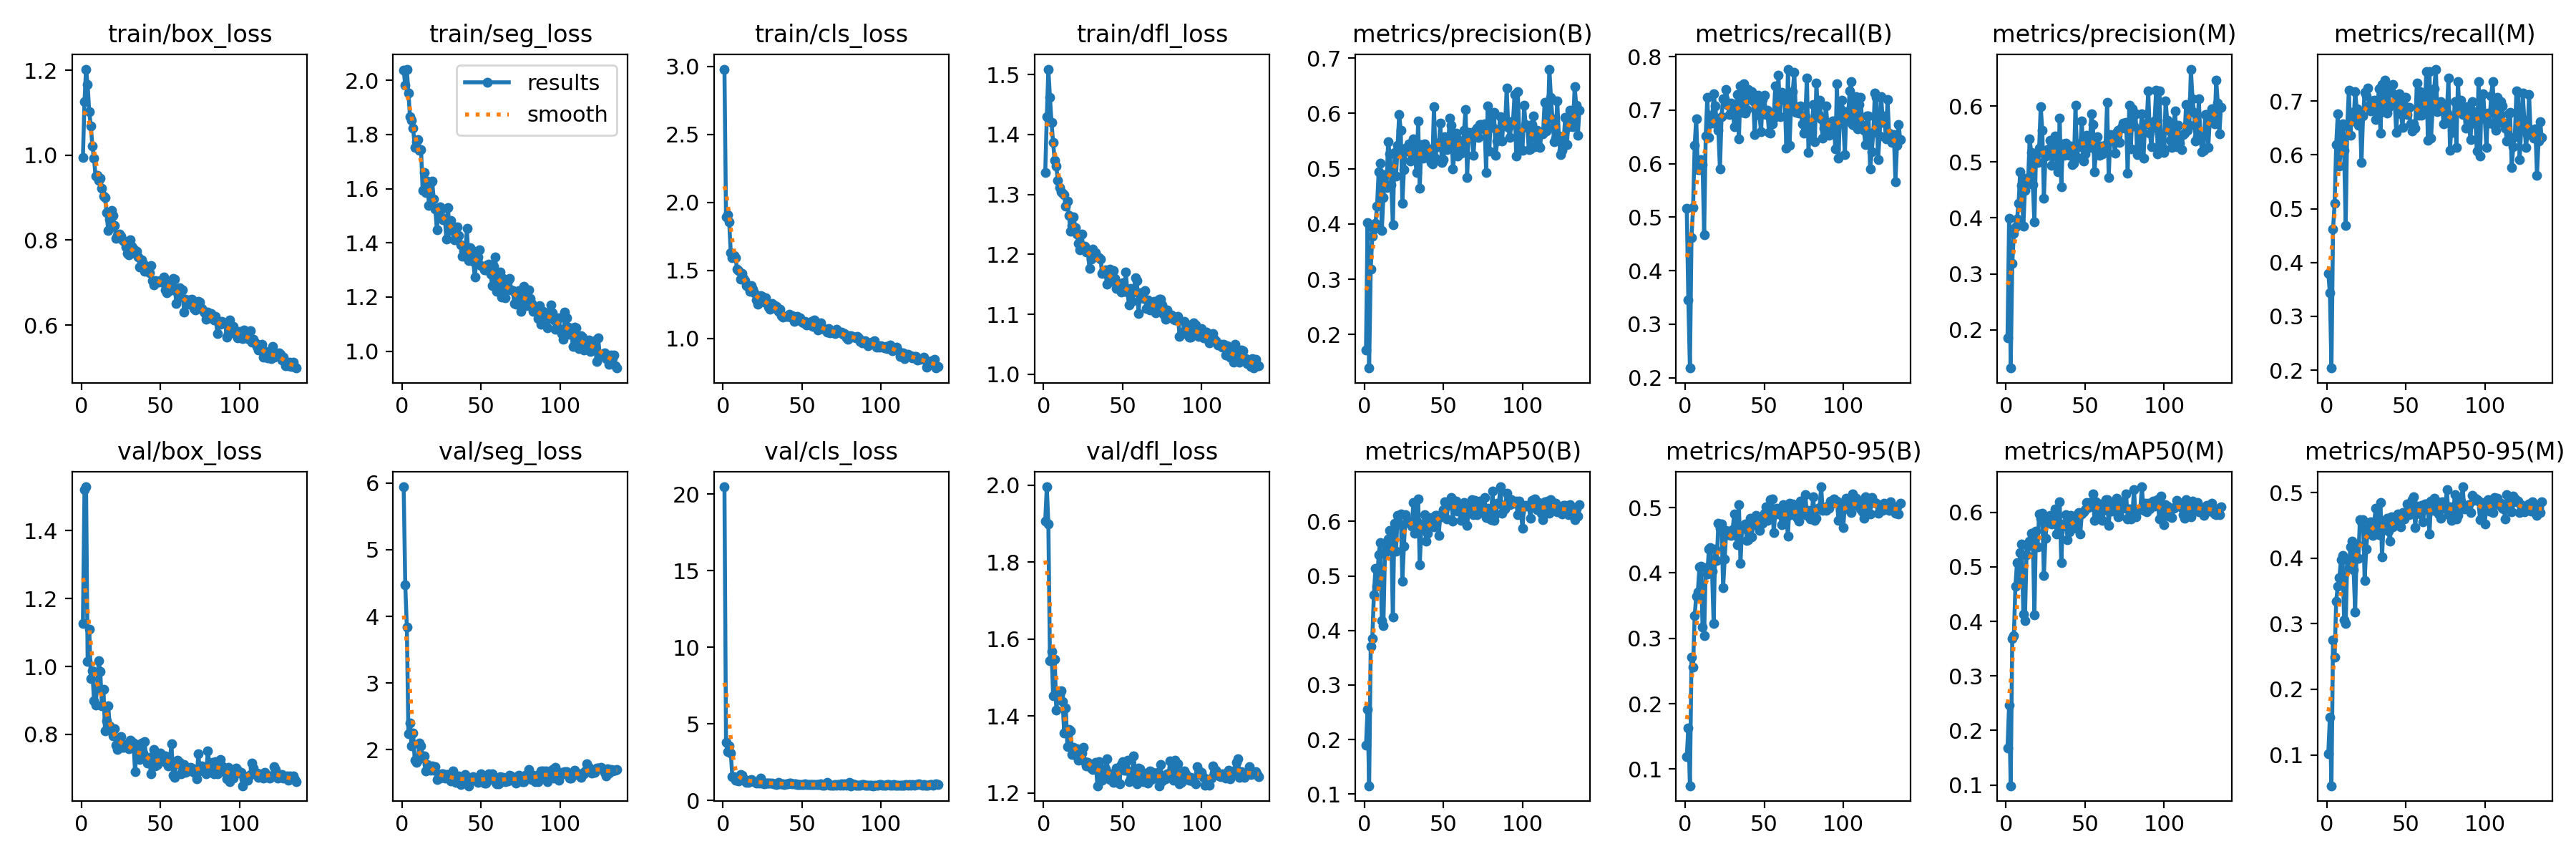

In [ ]:
Image(filename='/content/runs/segment/train2/results.png', width=1200)

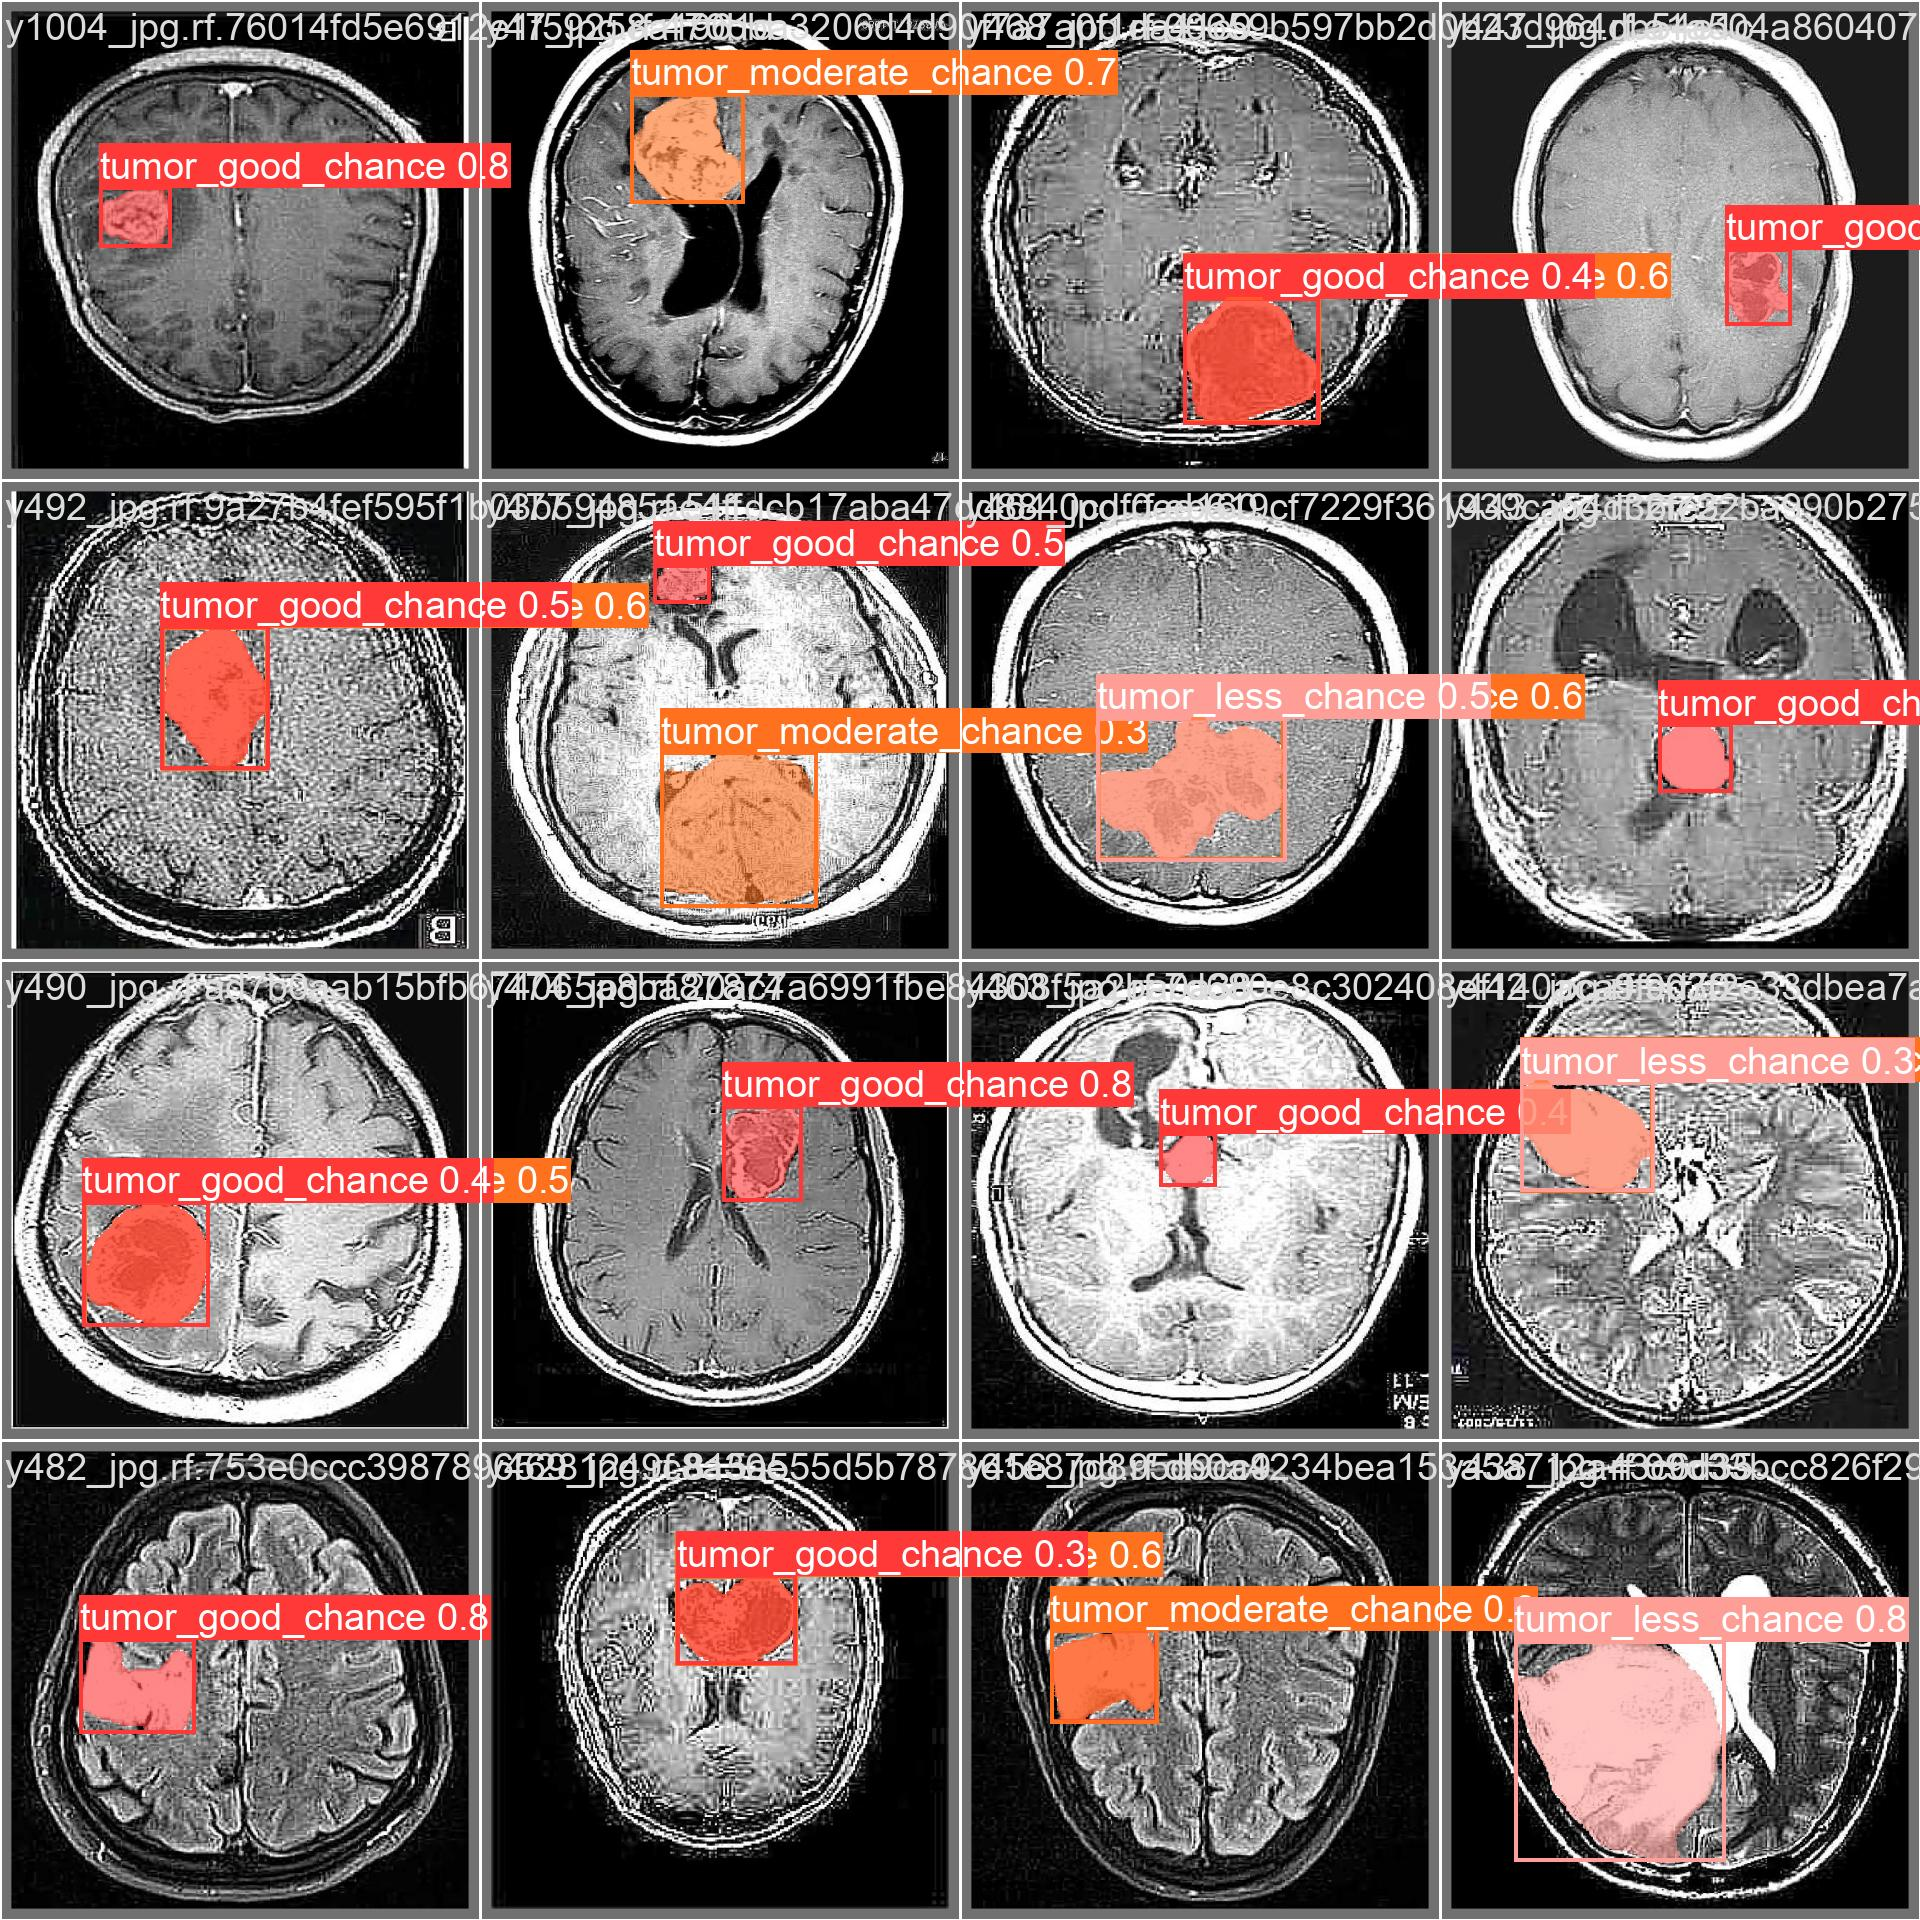

In [ ]:
Image(filename='/content/runs/segment/train2/val_batch0_pred.jpg', width=1200)